# Preprocess pictures for training

## Imports

In [1]:
import cv2 as cv
import os
import numpy as np
from tqdm.notebook import tqdm
import imutils
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import dlib
import matplotlib.pyplot as plt

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
fa = FaceAligner(predictor, desiredFaceWidth=224)

## Main function

In [197]:
def preprocess_face(img, mask, new_width):
    # Should be applied on an already cropped picture,
    # since the saved pictures are already cropped 
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = imutils.resize(gray, width = new_width)
    faces = detector(gray, 2)
    
    if len(faces) > 0:
        # if a face is detected, align it
        face = faces[0]
        (x, y, w, h) = rect_to_bb(face)
        gray = fa.align(gray, gray, face)
    else:
        # otherwise, we know it's there, so
        # just resize it
        gray = cv.resize(gray, (224, 224))
    # equalize histogram
    gray = cv.equalizeHist(gray)
    
    # apply mask
    gray[~mask] = 0
    return gray

In [190]:
def create_mask(a=92, b=112, n=224, r=112):
    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x*x + y*y/2 <= r*r/2
    return mask

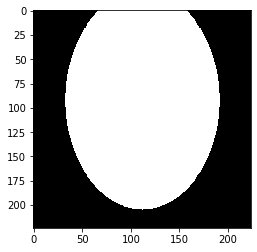

In [191]:
mask = create_mask()
plt.imshow(mask, cmap="gray")
plt.show()

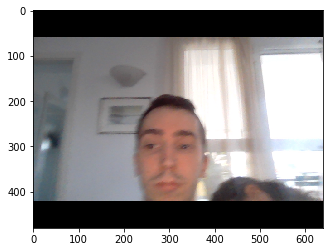

In [200]:
cap = cv.VideoCapture(0)
result, img = cap.read()
img = cv.flip(img, 1)
cap.release()
plt.imshow(img[:,:,::-1])
plt.show()

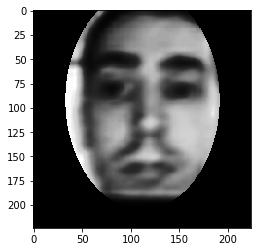

In [201]:
processed_face = preprocess_face(img, mask, 100)
plt.imshow(processed_face, cmap="gray")
plt.show()

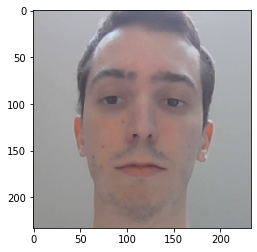

In [202]:
img = cv.imread("pictures_new/gian/gian_600.png")
plt.imshow(img[:,:,::-1])
plt.show()

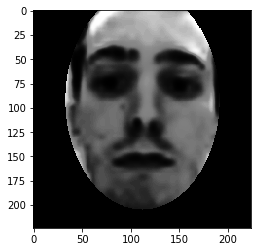

In [203]:
plt.imshow(preprocess_face(img, mask, 50), cmap="gray")
plt.show()

## Apply preprocess function to saved pictures

In [ ]:
def preprocess_faces(src_dir, dest_dir, mask, new_width=200):
    for file in tqdm(os.listdir(src_dir)):

        img = cv.imread(src_dir+"/"+file)
        os.makedirs(dest_dir, exist_ok=True)
        
        prep_img = preprocess_face(img, mask, new_width)
        
        cv.imwrite(dest_dir+"/"+file, prep_img)


In [ ]:
srcdir = "pictures_new/khaled"
outdir = "pictures_masked_resized_heavy/khaled"
preprocess_faces(srcdir, outdir, mask, 50)

In [ ]:
# takes a while
# could be made faster by first resizing the picture and then applying the face detector
srcdir = "pictures_new/"
outdir = "pictures_masked_resized_heavy/"
for name in os.listdir(srcdir): # or choose the folders of interest
    indir = srcdir+name
    destdir = outdir+name
    # print(indir, destdir)
    preprocess_faces(indir, destdir, mask, 50)

# Eyes

In [170]:
def get_eyes(face, predictor, img, grey):
    shape=predictor(grey,face)# left eye
    # left eye
    x1=shape.part(36).x
    x2=shape.part(39).x
    y1=shape.part(37).y
    y2=shape.part(40).y
    left_eye = img[y1:y2, x1:x2]
    # right eye
    x3=shape.part(42).x
    x4=shape.part(45).x
    y3=shape.part(43).y
    y4=shape.part(46).y
    right_eye = img[y3:y4, x3:x4]
    return left_eye, right_eye

In [206]:
def plot_eyes(img, detector, predictor):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = detector(gray, 1)
    if len(faces)>0:
        for face in faces:
            shape=predictor(gray,face)
            left_eye, right_eye = get_eyes(face, predictor,img, gray)
            print(left_eye.shape)
            print(right_eye.shape)
            f, axes = plt.subplots(2,2, figsize=(10,7))
            axes[0,0].imshow(img[:,:,::-1])
            axes[0, 1].imshow(gray,cmap="gray")
            axes[1, 0].imshow(left_eye[:,:,::-1])
            axes[1, 1].imshow(right_eye[:,:,::-1])
            plt.show()
            

(8, 27, 3)
(8, 28, 3)


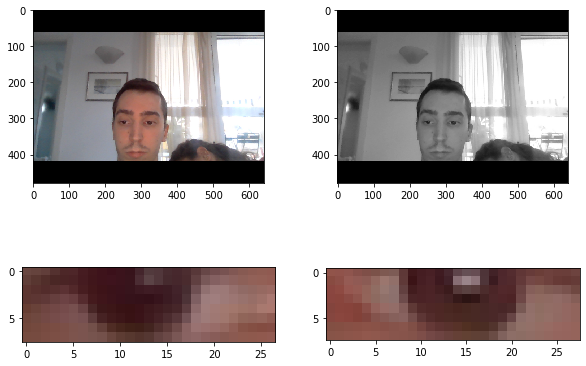

In [207]:
cap = cv.VideoCapture(0)
result, img = cap.read()
img = cv.flip(img, 1)
cap.release()
plot_eyes(img, detector, predictor)